### Diabetes Dataset

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.svm import SVC
%matplotlib inline


In [2]:
#Loading Data
diabetes_data = pd.read_csv("Resources/diabetes.csv")
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Loading and Preprocessing Data

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes_data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [5]:
clean_data = diabetes_data.copy()

In [6]:
clean_data[clean_data.columns[1:5]]==0

,Glucose,BloodPressure,SkinThickness,Insulin
0,False,False,False,True
1,False,False,False,True
2,False,False,True,True
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
763,False,False,False,False
764,False,False,False,True
765,False,False,False,False
766,False,False,True,True


In [7]:
diabetes_2 = clean_data[~(clean_data[clean_data.columns[1:5]]==0).any(axis=1)]
diabetes_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [8]:
# Define features set

X = diabetes_2.copy()
X.drop("Outcome",axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [9]:
#check the shape
X.shape

(393, 8)

In [10]:
# Define target vector
y = diabetes_2["Outcome"].ravel()
y[:5]

array([0, 1, 1, 1, 1])

In [11]:
diabetes_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


/Users/hamda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

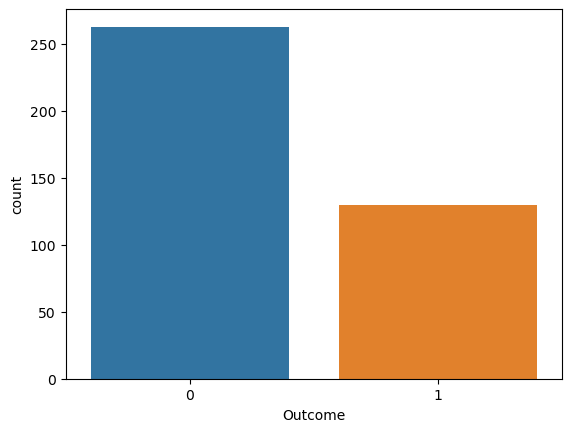

In [12]:
sns.countplot(diabetes_2['Outcome'],label="Count")

### Split X and y into training and testing sets

In [144]:
#Spliting the data 
X = diabetes_2.drop(columns = ['Outcome'])
y = diabetes_2.Outcome

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [146]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [147]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [148]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [113]:
# instantiate the Logistic Regression model
logreg = LogisticRegression(random_state=1)

# Fit the model using training data
logreg.fit(X_train_scaled, y_train)
y_pred_training = logreg.predict(X_train_scaled)
y_pred = logreg.predict(X_test_scaled)


In [114]:
# Train score
train_score = accuracy_score(y_train, y_pred_training)
train_score

0.7993197278911565

In [124]:
# Test score 
test_score = accuracy_score( y_test,y_pred)
test_score

0.7878787878787878

In [143]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
y_predict_training = logreg.predict(X_train_scaled)

### Evaluation

In [121]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[63, 12],
       [ 9, 15]])

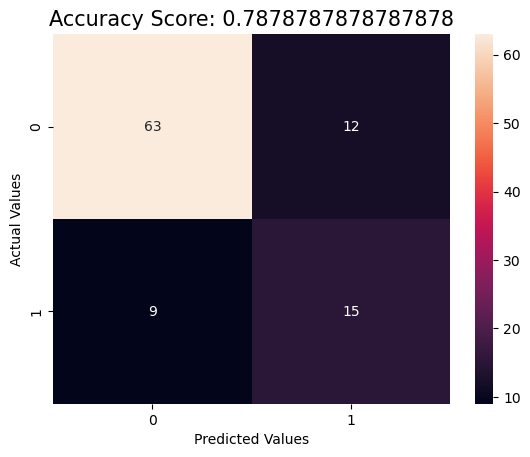

In [125]:
# plotting counfusion metric for logistic regression 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(test_score), size = 15)
plt.show()

In [132]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        75
           1       0.56      0.62      0.59        24

    accuracy                           0.79        99
   macro avg       0.72      0.73      0.72        99
weighted avg       0.80      0.79      0.79        99



In [129]:
patient = [[1,85,66,29,0,26.6,0.351,31 ]] 
logreg.predict(patient)


array([1])

### Visualisations

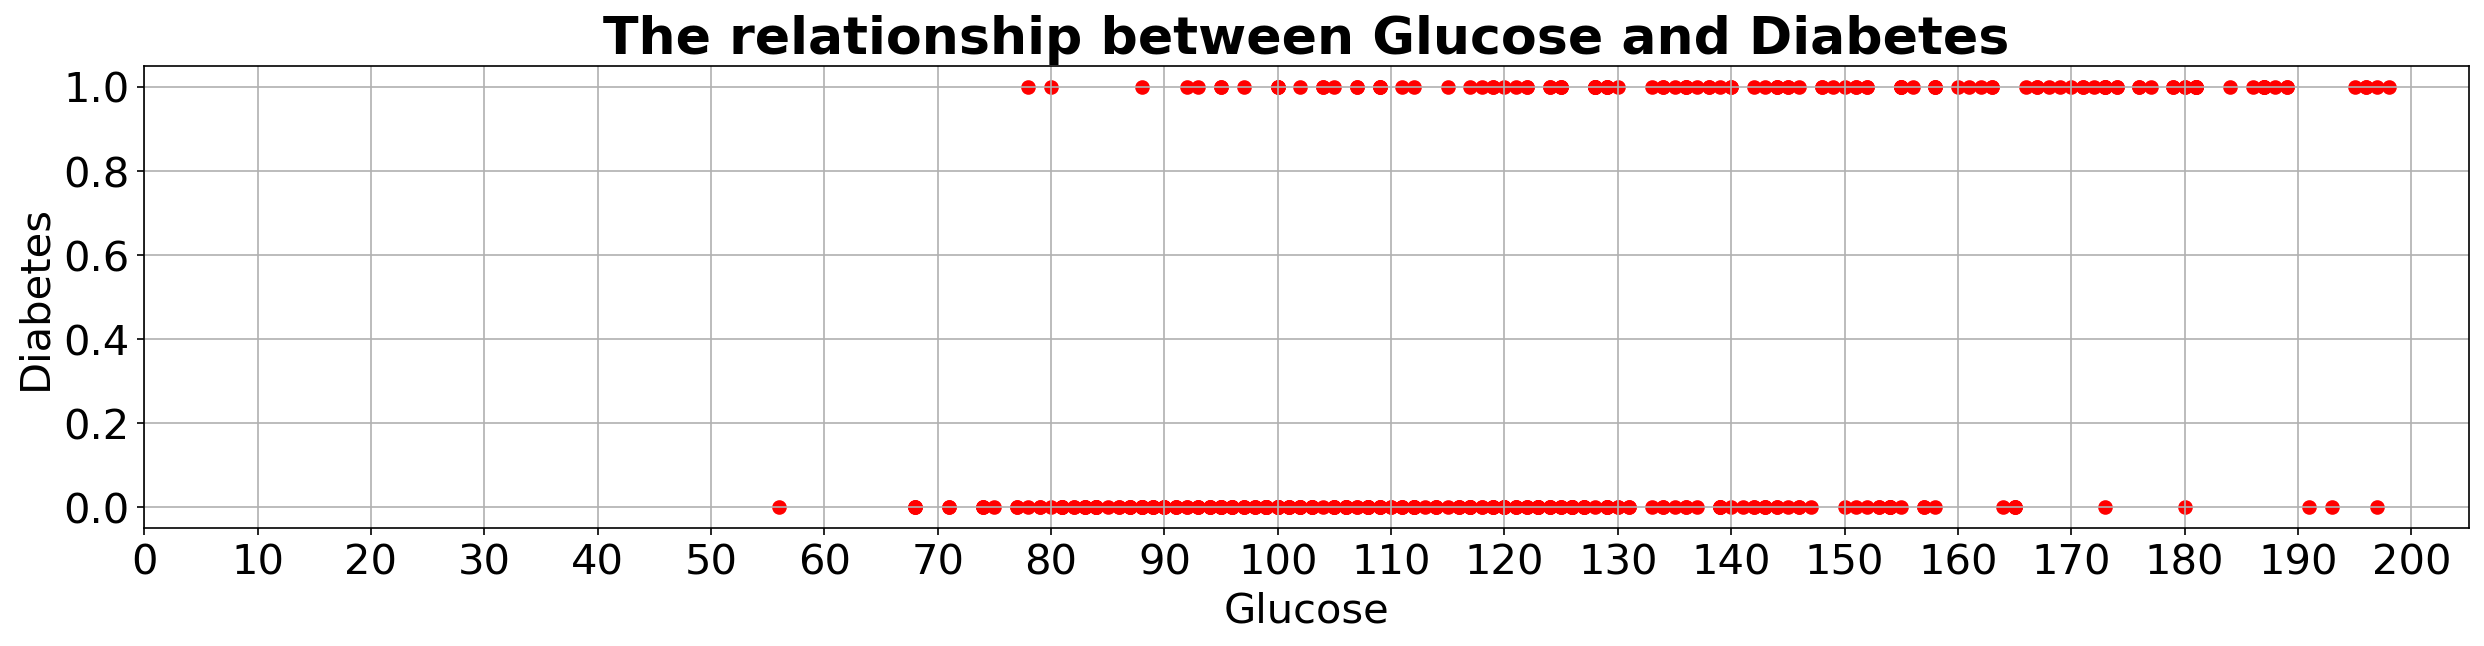

In [51]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (diabetes_2["Glucose"] , diabetes_2["Outcome"] , color = "red")
plt.title ("The relationship between Glucose and Diabetes" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

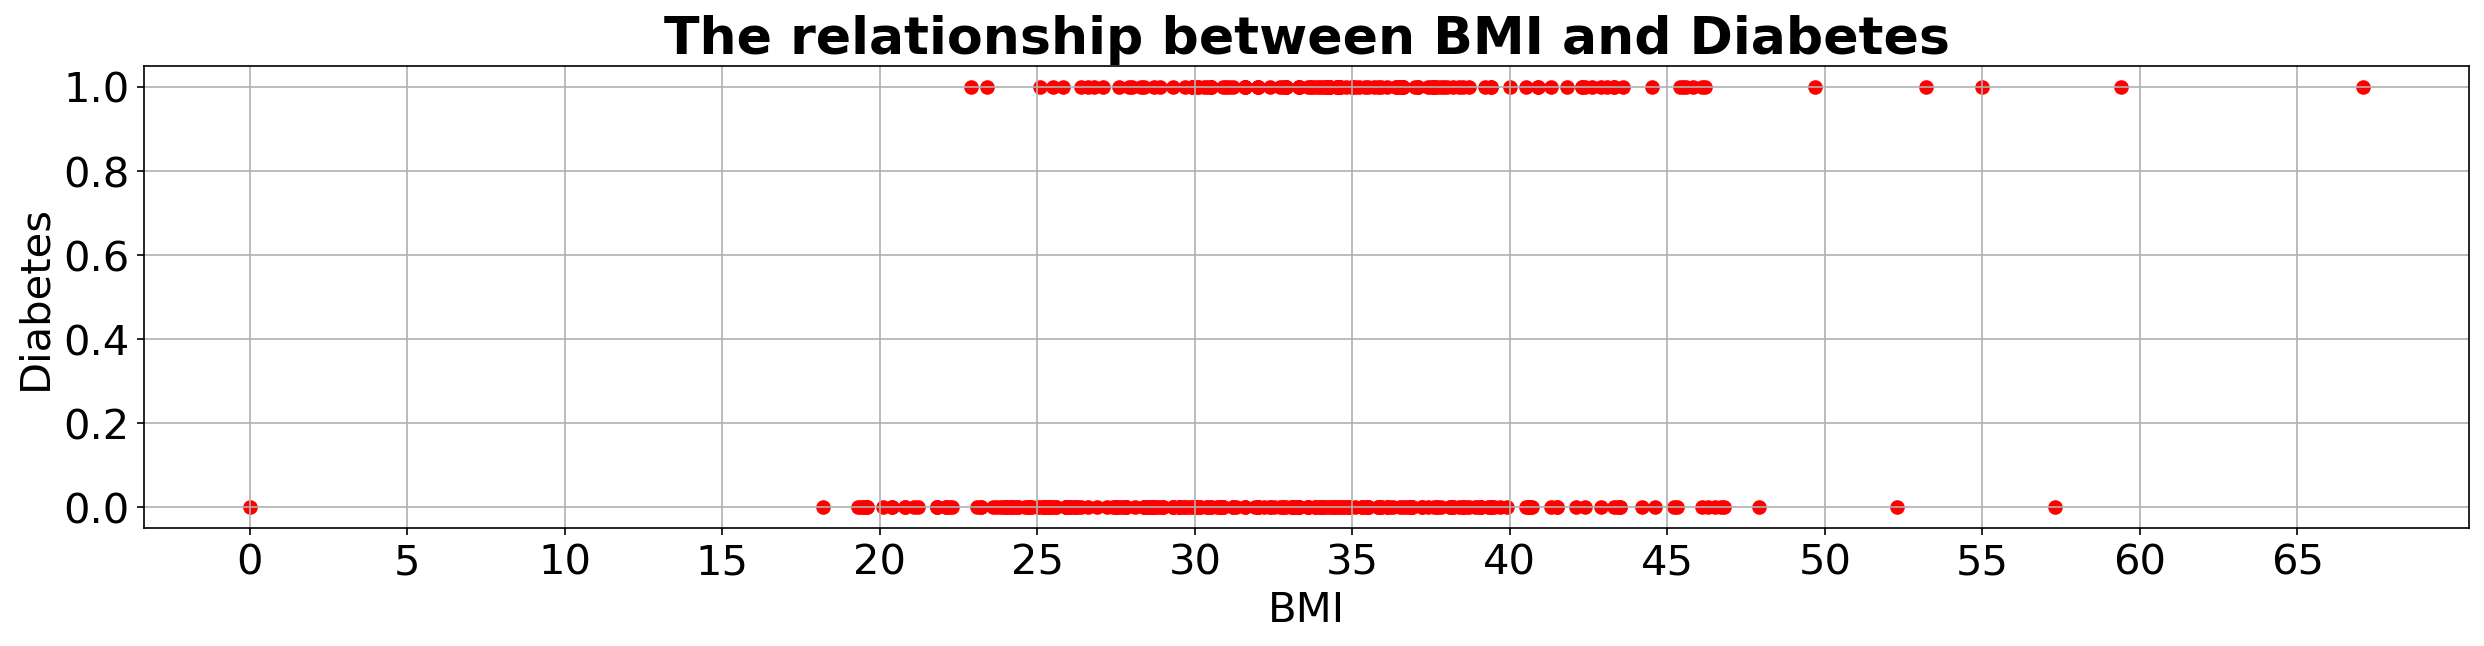

In [52]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (diabetes_2["BMI"] , diabetes_2["Outcome"] , color = "red")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

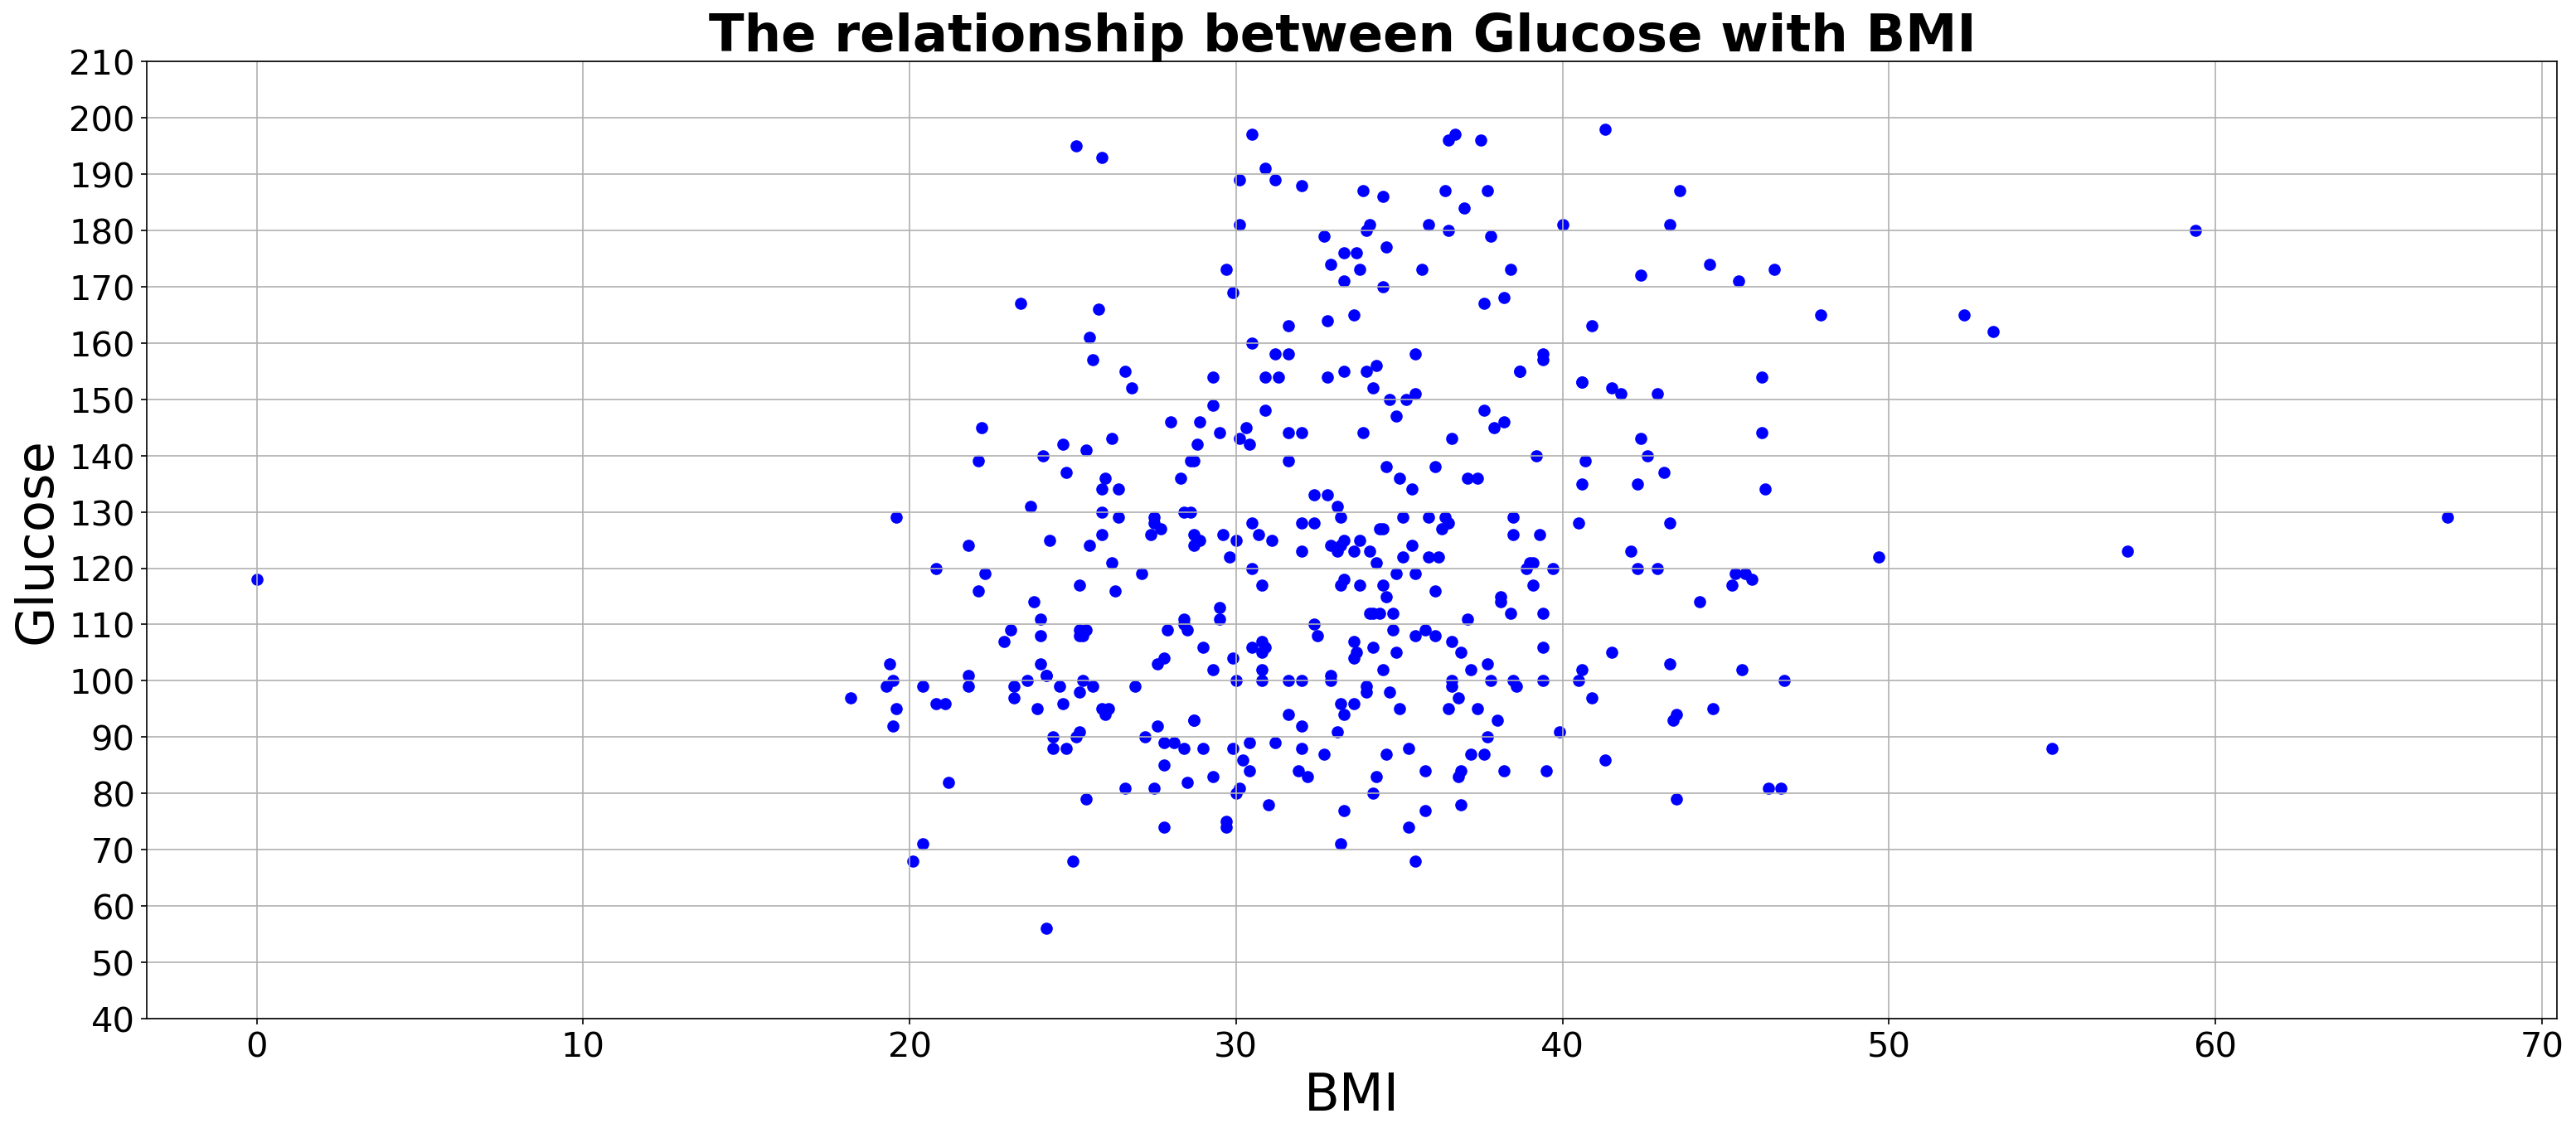

In [53]:
plt.figure(figsize = [25, 10] , dpi = 150) 
plt.scatter (diabetes_2["BMI"] , diabetes_2["Glucose"] , color = "blue")
plt.title ("The relationship between Glucose with BMI " , weight = 'bold', fontsize = 30)
plt.xticks (range (0 , 80 , 10) , fontsize = 20)
plt.yticks (range (40 , 220 , 10) , fontsize = 20)
plt.xlabel ('BMI', fontsize = 30 )
plt.ylabel ('Glucose' , fontsize = 30)
plt.grid ()
plt.show ()

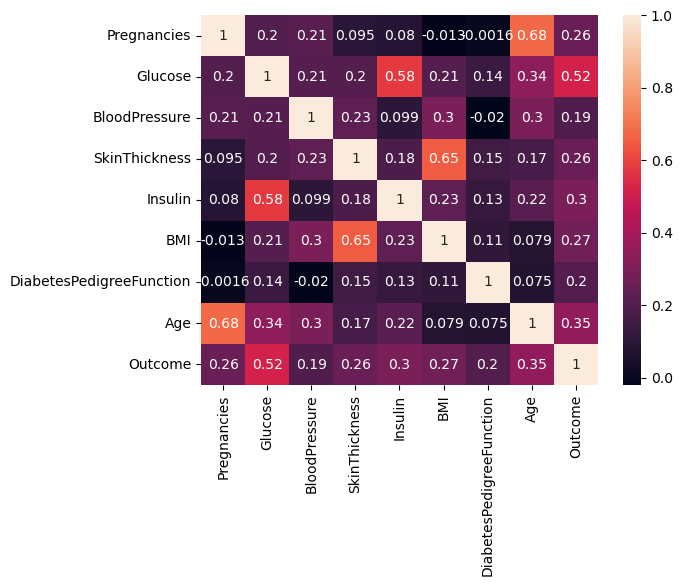

In [133]:
# Correlation heatmap
sns.heatmap(diabetes_2.corr(), annot = True)
plt.show()

Text(0.5, 0, 'Importance')

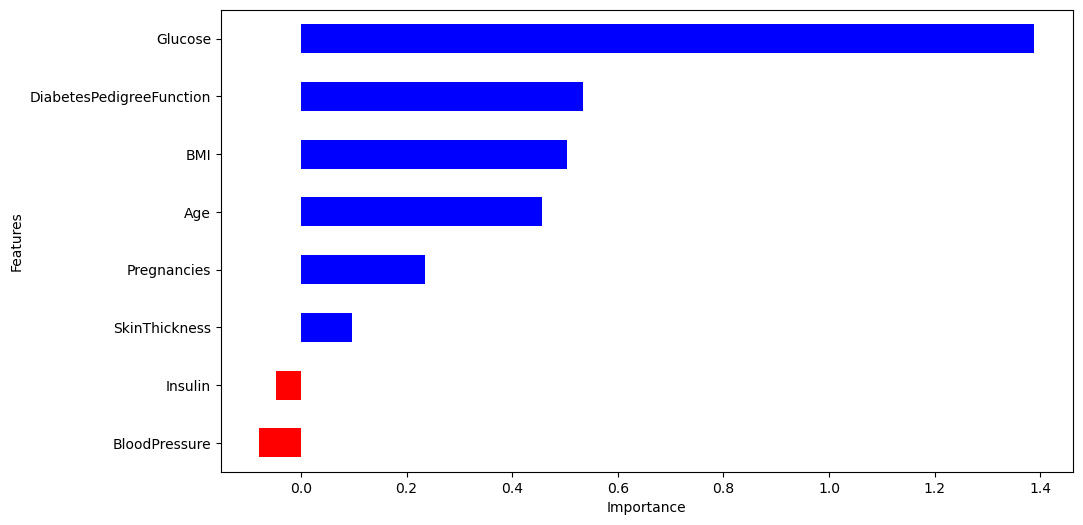

In [142]:
coeff = list(logreg.coef_[0])
labels = list(X.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

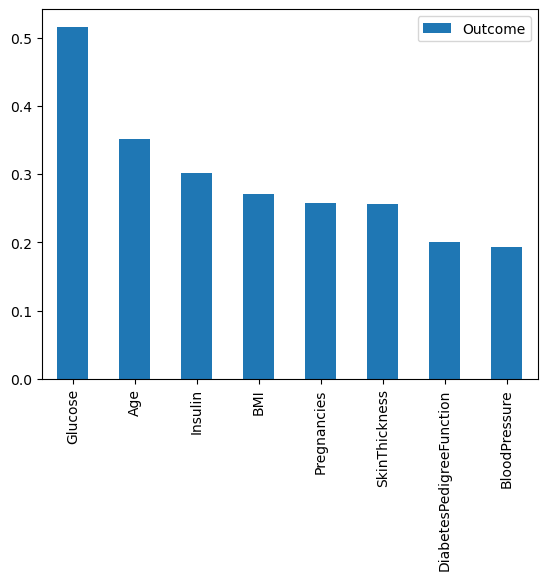

In [107]:
coeff = diabetes_2.corr()[['Outcome']].iloc[:8].sort_values("Outcome", ascending=False)
coeff.plot(kind="bar") 
plt.show()